In [1]:
import plotly
import plotly.io as pio
import sys

print("Plotly version:", plotly.__version__)
print("Renderer:", pio.renderers.default)
pio.renderers.default = 'notebook_connected'

Plotly version: 6.3.1
Renderer: vscode


In [2]:
%reload_ext autoreload
%autoreload 2
import sys, os
sys.path.append(os.path.abspath(".."))

In [3]:
# 自动选择合适的渲染器
if "ipykernel" in sys.modules:
    pio.renderers.default = "notebook_connected"   # ✅ 用于 Jupyter / VS Code
else:
    pio.renderers.default = "browser"              # ✅ 命令行时自动开HTML

print(f"[INFO] Plotly renderer set to: {pio.renderers.default}")

[INFO] Plotly renderer set to: notebook_connected


In [4]:
import sys
print(sys.executable)
print("ipykernel" in sys.modules)

c:\Projects\NHL Game Score Prediction Project\venv311\Scripts\python.exe
True


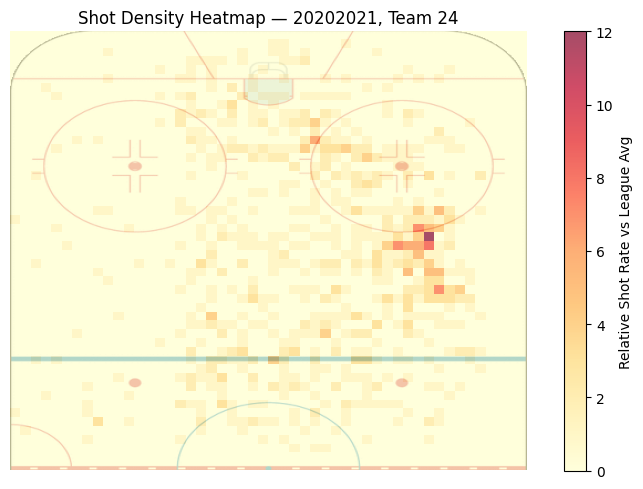

[INFO] Shot map rendered: mode=heatmap, team=24, season=20202021


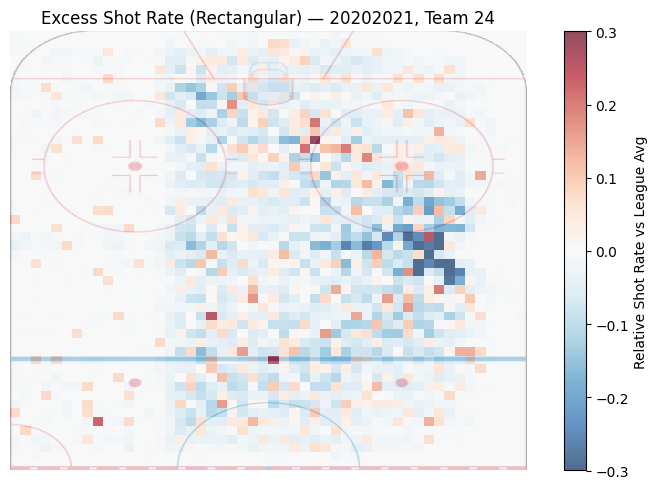

[INFO] Shot map rendered: mode=diff, team=24, season=20202021


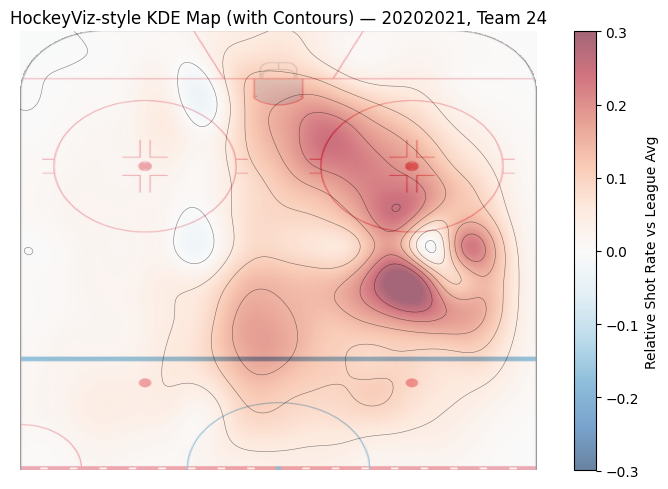

[INFO] Shot map rendered: mode=hockeyviz, team=24, season=20202021


In [ ]:
from src.visualization.advanced_visualization.shot_map import plot_hockeyviz_map_interactive

# 1️⃣ 基本热力图
plot_hockeyviz_map_interactive(season="20202021", team_id=24, mode="heatmap")

# 2️⃣ 差异矩形图
plot_hockeyviz_map_interactive(season="20202021", team_id=24, mode="diff")

# 3️⃣ HockeyViz 风格 KDE 平滑图
plot_hockeyviz_map_interactive(season="20202021", team_id=24, mode="hockeyviz")


Dropdown(description='Season', index=4, options=('20162017', '20172018', '20182019', '20192020', '20202021'), …

BoundedIntText(value=24, description='Team ID', min=1)

Dropdown(description='Mode', index=2, options=('heatmap', 'diff', 'hockeyviz'), value='hockeyviz')

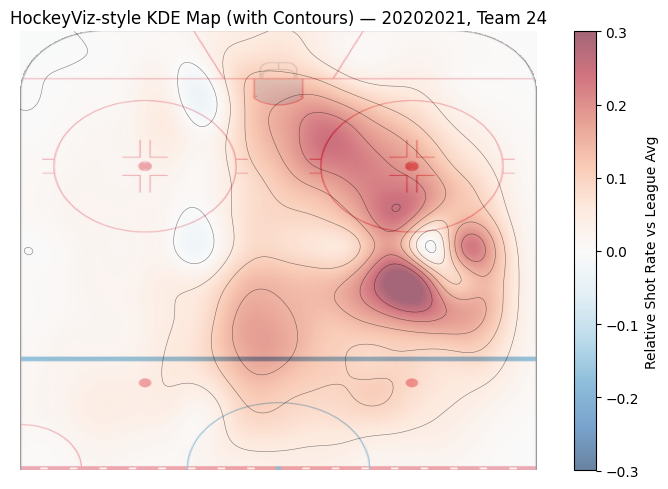

[INFO] Shot map rendered: mode=hockeyviz, team=24, season=20202021


In [1]:
%reload_ext autoreload
%autoreload 2
import sys, os
sys.path.append(os.path.abspath(".."))

import ipywidgets as w
from IPython.display import display
from src.visualization.advanced_visualization.shot_map import plot_hockeyviz_map_interactive

seasons = ["20162017","20172018","20182019","20192020","20202021"]
season_dd = w.Dropdown(options=seasons, value="20202021", description="Season")
team_dd   = w.BoundedIntText(value=24, min=1, max=100, description="Team ID")
mode_dd   = w.Dropdown(options=["heatmap","diff","hockeyviz"],
                       value="hockeyviz", description="Mode")

def _run(_=None):
    plot_hockeyviz_map_interactive(
        season=season_dd.value,
        team_id=team_dd.value,
        processed_dir="../data/processed",
        raw_dir="../data/raw",
        rink_path="../src/visualization/advanced_visualization/rink.png",
        mode=mode_dd.value
    )

for wdg in (season_dd, team_dd, mode_dd):
    wdg.observe(_run, names="value")
display(season_dd, team_dd, mode_dd)
_run()